### Day 4: More Logic and Simulations
Run the cell below to import the required packages for this notebook:

In [87]:
# the plotting package is matplotlib:
import matplotlib.pyplot as plt 
# the next line allows you to view the plots more easily:
%matplotlib inline
# the numpy package has import math stuff in it:
import numpy as np 
# the pandas package allows us to do spreadsheet stuff:
import pandas as pd
#the random package
import random



Let's review an exercise from yesterday:
### Exercise 11 - Multiples
Write a function called multiples_of_m that that takes in integers m and n and returns a list containing all of the multiples of m between 0 and n, inclusive.

Here's one solution:

In [141]:
def multiples_of_m(m, n):
    multiples = []
    for i in range(n+1):
        if i % m == 0:
            multiples.append(i)
            
    return multiples

multiples_of_m(4, 24)

[0, 4, 8, 12, 16, 20, 24]

Here's another solution by referencing the last item in the list:

In [144]:
def multiples_of_m(m, n):
    multiples = [0]
    
    steps = int(n/m)
    for i in range(steps):

        multiples.append(multiples[-1]+m)
            
    return multiples

multiples_of_m(3, 22)

[0, 3]

Sometimes, we may need a double for loop to complete tasks (think: filling up a matrix!). To do that, we'll use 2 different counter variables, often denoted by i and j:

In [145]:
for i in range(3):
    for j in range(5):
        print(f"i:{i},j:{j}")

i:0,j:0
i:0,j:1
i:0,j:2
i:0,j:3
i:0,j:4
i:1,j:0
i:1,j:1
i:1,j:2
i:1,j:3
i:1,j:4
i:2,j:0
i:2,j:1
i:2,j:2
i:2,j:3
i:2,j:4


We can use a double for loop to create multiplication tables:

In [148]:
def mult_tables(m,n):
    for i in range(m+1):
        for j in range(n+1):
            print(f"{i}x{j}={i*j}")
            
mult_tables(4,3)

0x0=0
0x1=0
0x2=0
0x3=0
1x0=0
1x1=1
1x2=2
1x3=3
2x0=0
2x1=2
2x2=4
2x3=6
3x0=0
3x1=3
3x2=6
3x3=9
4x0=0
4x1=4
4x2=8
4x3=12


### Exercise 1 - Triple for loop

Create a TRIPLE for loop that goes through 3 iterations in the outer loop, 4 in the middle loop, and 2 in the inner most loop.

How many total iterations do the loops make? Use a counter variable to keep track of how many times the loop executes.

In [149]:
#insert exercise
def threematrix(m,n,p):
    counter = 0
    for i in range(m):
        for j in range(n):
            for k in range(p):
                counter = counter + 1
    return counter
threematrix(3,4,2)

24

Let's return to our factor function that prints factors of a given integer n:

In [93]:
def factors(n):
    for i in range(1,n+1):
        if n % i == 0:
            print(i)
factors(49)

1
7
49


How would we figure out if a number is prime or not? Well all numbers are divisible by 1 and themselves, so we would want to exclude those from our range when printing out possible divisors:

In [159]:
def factors(n):
    for i in range(1,n+1):
        if n % i == 0:
            print(i)
factors(7)

1
7


Then, as soon as we find the first divisor of the number, we conclude that our number is NOT prime:

In [95]:
def factors(n):
    for i in range(2,n):
        if n % i == 0:
            print(f"{i} is a factor! Thus, {n} is NOT prime!")
factors(49)

7 is a factor! Thus, 49 is NOT prime!


A Boolean (True/False) is a popular way to keep of track of whether your number is prime or not. We'll start out assuming that our number is prime, but if we find even one number that is a divisor, we will turn our assumption to NOT prime:

In [172]:
import math
def is_prime(n):
    max_factor = int(math.sqrt(n))
    for i in range(2,max_factor+1):
        if n % i == 0:
            return False
    return True

print(is_prime(47))


True


In [174]:
for i in range(2,25):
    if is_prime(i) == True:
        print(i)
    

2
3
5
7
11
13
17
19
23


### In-class Questions
Q1: There are many ways to make this algorithm more efficient. Can you think of a few?

Q2: Why wouldn't it work if we started out assuming that the number was NOT prime and changed our assumption to IS prime for the first non-divisor we found? 

Q1 answer: Some possibilities are a.) Only checking for divisors up to $\sqrt n$ instead of $n$ and b.) Exiting the loop as soon as we find the first factor rather continuing all the way to $n$.

Q2 answer: 6 would falsely be classified as prime because the last number that our algorithm would check, 5, does not go into 6 evenly.

Recall our dog loop from yesterday:

In [97]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
for dog in dogs:
    print(dog)

border collie
australian cattle dog
labrador retriever


There is another way to refer to items in a list other than "for doggie in dogs" or "for item in list_of_items." We can also reference the index. Here's an example:

In [187]:
dogs = ['border collie', 'chow', 'australian cattle dog', 'labrador retriever']
for i in range(len(dogs)):
    print(i)
    print(f"{dogs[i]} and {dogs[i+1]}")

0
border collie and chow
1
chow and australian cattle dog
2
australian cattle dog and labrador retriever
3


IndexError: list index out of range

Similarly, to print a list of expenses:

In [99]:
expenses = [20, 100, -50, 0, 80]

for i in range(len(expenses)):
    print(expenses[i])

20
100
-50
0
80


We can count up the expenses by typing:

In [100]:
expenses = [20, 100, -50, 0, 80]

balance = 0
for i in range(len(expenses)):
    balance = balance + expenses[i]
print(balance)

150


### Exercise 2 - Bank Balance

Suppose your list of expenses ```expenses = [20, 100, -50, 0, 80]``` and you start out with $500 in your bank account. Print out your final balance using a "for i in range(len(expenses))" statement.

In [101]:
#insert exercise 2
expenses = [20, 100, -50, 0, 80]

balance = 500
for i in range(len(expenses)):
    balance = balance - expenses[i]
print(balance)

350


This np.arange function will help us create an Euler's method.

Recall that Euler's method lets us approximate the solution to the differential equation $\frac{dy}{dx}=f(x)$ given the initial $f(x_0)=y_0$ and a step size of $h$ using the difference equations:

$ x_{n+1}=x_n+h $

$ y_{n+1}=y_n+hf(x_n,y_n) $



Here's an Euler's method approximation of $\frac{dy}{dx}=\sin(x)$ given the initial condition $f(0)=1$ and a step size of $h=0.5$ for ending at $x=2$:

In [102]:
def euler(f,x0,y0,h,xn):
    x = [x0]
    y = [y0]
    print(x[0],y[0])
    steps = int((xn-x0)/h)
    
    for i in range(1,steps+1):
        x_new = x[i-1]+h
        y_new = y[i-1]+h*f(x[i-1])
        
        x.append(x_new)
        y.append(y_new)
        print(x[i], y[i])

euler(np.sin, 0, 1, 0.5, 2)

0 1
0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077


We can then plot the coordinates:

0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077


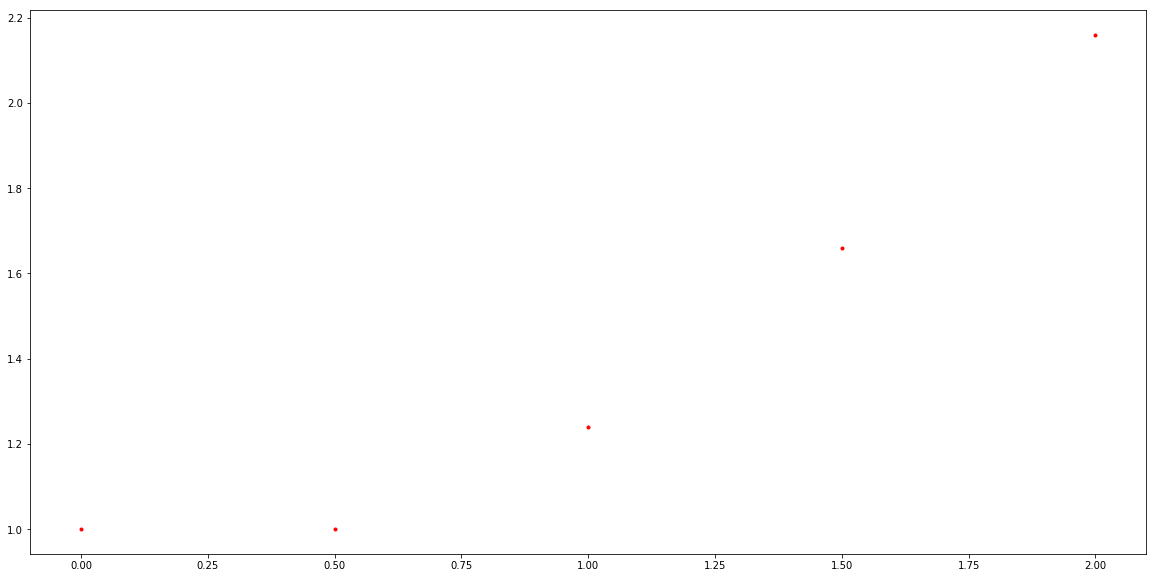

In [193]:
def euler(f,x0,y0,h,xn):
    x = [x0] #these two lines populate first row of table
    y = [y0]
    steps = int((xn-x0)/h) #(2-0)/0.5 = 4 rows after first row
    
    for i in range(steps):
        x_new = x[i]+h #these two lines are the Euler's formulas
        y_new = y[i]+h*f(x[i])
        
        print(x_new, y_new)
        
        x.append(x_new) #adding these coordinates to lists
        y.append(y_new)
    plt.plot(x,y,'r.') #plotting

euler(np.sin, 0, 1, 0.5, 2)

0 1
0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077


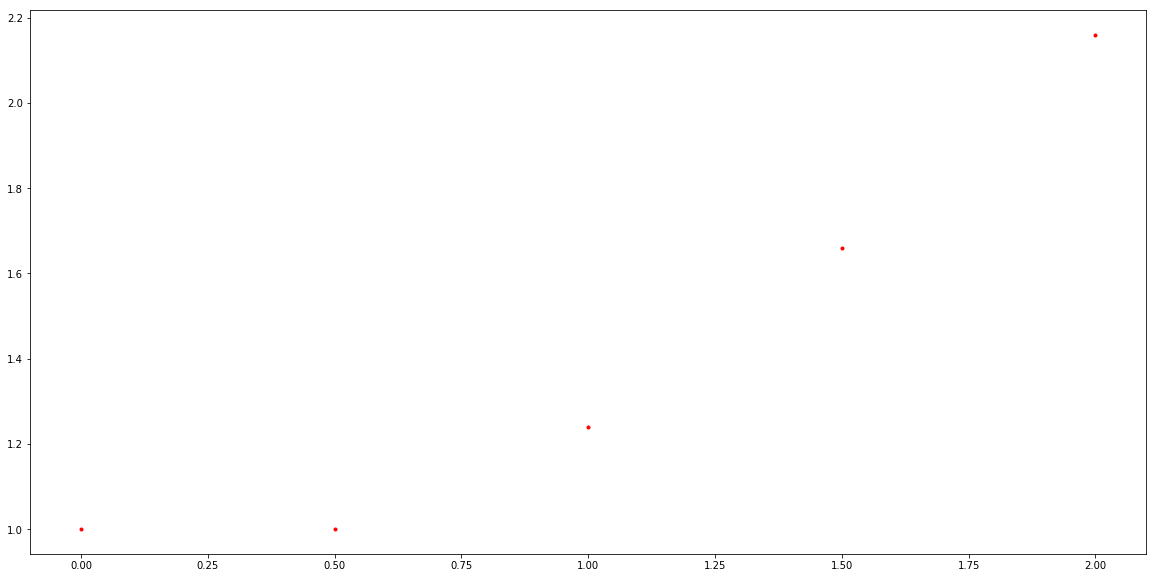

In [191]:
def euler(f,x0,y0,h,xn):
    x = [x0] #these two lines populate first row of table
    y = [y0]
    steps = int((xn-x0)/h) #(2-0)/0.5 = 4 rows after first row
    print(x0,y0)
    for i in range(1,steps+1):
        x_new = x[i-1]+h #these two lines are the Euler's formulas
        y_new = y[i-1]+h*f(x[i-1])
        print(x_new, y_new)
        x.append(x_new) #adding these coordinates to lists
        y.append(y_new)
    plt.plot(x,y,'r.') #plotting

euler(np.sin, 0, 1, 0.5, 2)

How does the Euler's method approximation compare to the true solution $y=2-\cos(x)$?

0 1
0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077


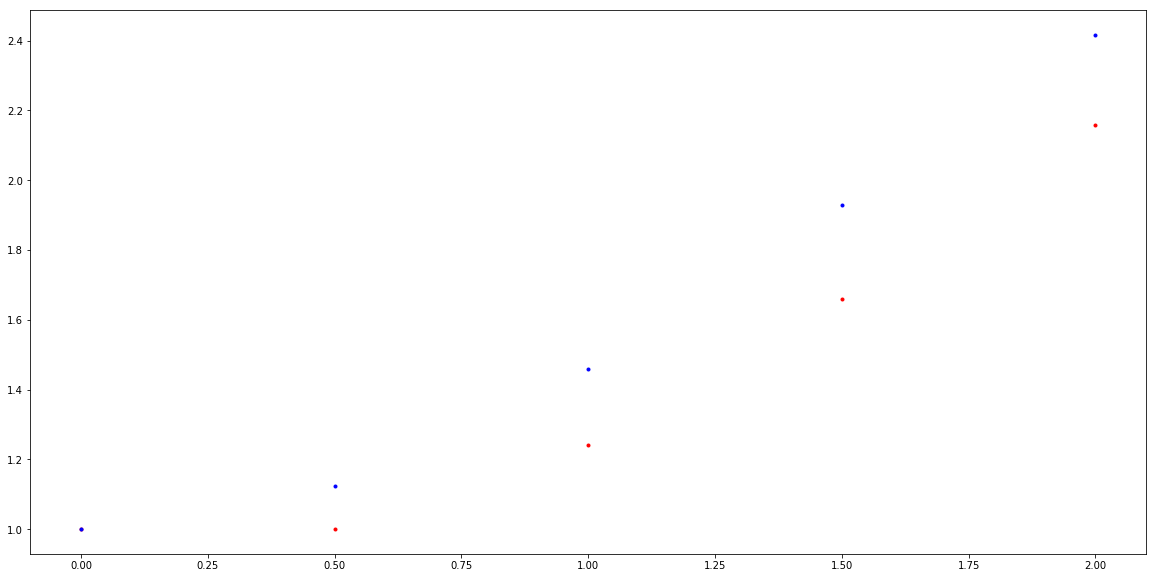

In [200]:
def euler(f,x0,y0,h,xn):
    x = [x0]
    y = [y0]
    print(x[0],y[0])
    steps = int((xn-x0)/h)
    
    for i in range(steps):
        x_new = x[i]+h #these two lines are the Euler's formulas
        y_new = y[i]+h*f(x[i])
        print(x_new, y_new)
        x.append(x_new)
        y.append(y_new)
    plt.plot(x,y,'r.') # plotting your euler's approximation
#    plt.plot(x,2-np.cos(x),'b.') #exact solution to specifically f(x)=sin(x), f(0)=1

euler(np.sin, 0, 1, 0.5, 2)

As another example, suppose I want to create the Fibonacci sequence by referencing the last two items in my list and adding them:

In [105]:
def fibonacci(n):
    sequence = [1,1]
    for i in range(2,n):
        sequence.append(sequence[i-1]+sequence[i-2])
    return sequence

fibonacci(7)

[1, 1, 2, 3, 5, 8, 13]

### Exercise 3 - Triple Fibonacci
Assume the first three terms of the sequence are 1, 1, and 1. Generate the next term in the sequence by summing the previous THREE terms. Create a function called triple_fibonnaci that takes in a positive integer n greater than three and returns a list containing the first n terms of this sequence.

In [106]:
#insert exercise 3
def triple_fibonacci(n):
    sequence = [1,1,1]
    for i in range(3,n):
        sequence.append(sequence[i-1]+sequence[i-2]+sequence[i-3])
    return sequence

triple_fibonacci(7)

[1, 1, 1, 3, 5, 9, 17]

### Exercise 4 - Euler's plot
Given $f(x)=\cos(x)$ with $f(0)=2$ and a step size of $0.25$ until $x=3$, plot the Euler's method approximation coordinates versus the true solution, $f(x)=\sin x + 2$.

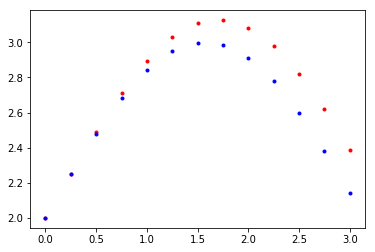

In [107]:
#insert exercise 4

def euler(f,x0,y0,h,xn):
    x = [x0]
    y = [y0]
    steps = int((xn-x0)/h)
    
    for i in range(1,steps+1):
        x_new = x[i-1]+h
        y_new = y[i-1]+h*f(x[i-1])
        
        x.append(x_new)
        y.append(y_new)
    plt.plot(x,y,'r.')
    plt.plot(x,2+np.sin(x),'b.')

euler(np.cos, 0, 2, 0.25, 3)

### Exercise 5 - Left hand sum (calculus application)
Write a program called LHS that takes in a function, a left boundary a, a right boundary b, and the number of rectangles, n, and returns the left hand sum approximation for $\int_a^b f(x)dx \approx \sum_{i=1}^nf(x_{i-1})\Delta x$. For example, LHS(square,1,5,8) should return 35.5.

In [108]:
#insert exercise 5
def square(x):
    return x**2

def LHS(f,a,b,n):
    h = (b-a)/n
    left = 0
    for i in range(n):
        left = left + h*f(a+i*h)
    return left

LHS(square,1,5,8)

35.5

### In-class Exercise: Great Lakes Pollution or SIRS Infectious Disease
Look at Great Lakes Problem (precal) or the SIRS infectious disease problem (calc). Use iteration and plotting to view the solution. First, do the iteration in a spreadsheet and THEN do it in Python.

In [ ]:
#insert Python

### Great Lakes Solution

Here is one solution:

0 3500 1800 2400
0 3140.0 1537.0 2760.0
0 2819.6 1329.08 2982.12
0 2534.444 1160.7672 3102.7344
0 2280.65516 1021.679848 3148.282464
0 2054.7830924 904.74717032 3138.2933135999997
0 1853.756952236 805.0643291688 3087.4070972831996
0 1674.8436874900399 719.154435413992 3006.7414041099837
0 1515.6108818661355 644.4916442888593 2904.8280323658228
0 1373.8936848608605 579.1918493501448 2788.265660425913


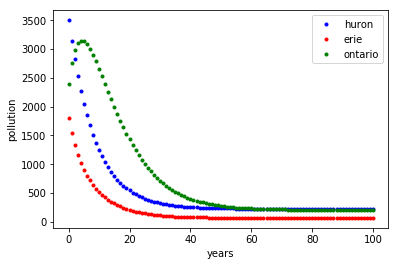

In [109]:
huron = [3500]
erie = [1800]
ontario = [2400]
years = [0]
for i in range(100):
    huron.append(25-0.11*huron[i]+huron[i])
    erie.append(0.11*huron[i]-0.36*erie[i]+erie[i])
    ontario.append(0.36*erie[i]-0.12*ontario[i]+ontario[i])
    years.append(years[i]+1)
    
for i in range(10):
    print(years[0],huron[i], erie[i], ontario[i])
    
plt.plot(years, huron, 'b.', label = 'huron')
plt.plot(years, erie, 'r.', label = 'erie')
plt.plot(years, ontario, 'g.', label = 'ontario')
plt.xlabel('years')
plt.ylabel('pollution')
plt.legend(loc='upper right')

Here is another solution:

0 3500 1800 2400
0 3140.0 1537.0 2760.0
0 2819.6 1329.08 2982.12
0 2534.444 1160.7672 3102.7344
0 2280.65516 1021.679848 3148.282464
0 2054.7830924 904.74717032 3138.2933135999997
0 1853.756952236 805.0643291688 3087.4070972831996
0 1674.8436874900399 719.154435413992 3006.7414041099837
0 1515.6108818661355 644.4916442888593 2904.8280323658228
0 1373.8936848608605 579.1918493501448 2788.265660425913


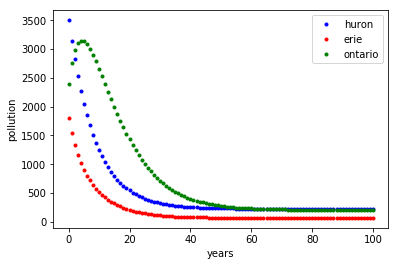

In [110]:
huron = [3500]
erie = [1800]
ontario = [2400]
years = [0]
for i in range(100):
    huron.append(25-0.11*huron[-1]+huron[-1])
    erie.append(0.11*huron[-2]-0.36*erie[-1]+erie[-1])
    ontario.append(0.36*erie[-2]-0.12*ontario[-1]+ontario[-1])
    years.append(years[-1]+1)
    
for i in range(10):
    print(years[0],huron[i], erie[i], ontario[i])
    
plt.plot(years, huron, 'b.', label = 'huron')
plt.plot(years, erie, 'r.', label = 'erie')
plt.plot(years, ontario, 'g.', label = 'ontario')
plt.xlabel('years')
plt.ylabel('pollution')
plt.legend(loc='upper right')

### SIRS Solution

0 0.9 0.1 0.0
1 0.846 0.12000000000000001 -2.7755575615628914e-17
2 0.788488 0.14011200000000001 0.034000000000000016
3 0.7293420216063999 0.15875989839360002 0.07140000000000002
4 0.671057670459751 0.17425569208642494 0.11189808000000004
5 0.6163649629276126 0.18517012805456123 0.1546866374538241
6 0.5677320263612047 0.19069171198420093 0.1984649090178262
7 0.5269325772936175 0.1908136051426192 0.2415762616545944
8 0.4948304162057017 0.18626452223842085 0.2822538175637633
9 0.47141931172313306 0.17823619531551413 0.3189050615558775


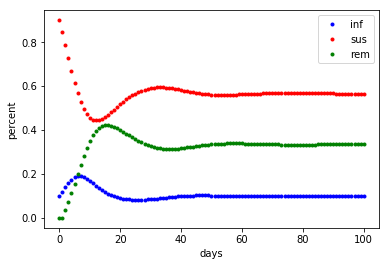

In [111]:
sus = [0.9]
inf = [0.1]
rem = [0.0]
days = [0]

#create your ds/dt and di/dt functions
def ds_dt(s,i):
    return -0.6*s*i+0.1*(1-s-i)

def di_dt(s,i):
    return 0.6*s*i-.34*i

#Euler's method
for i in range(100):
    sus.append(sus[i]+1*ds_dt(sus[i], inf[i]))
    inf.append(inf[i]+1*di_dt(sus[i], inf[i]))
    rem.append(1-sus[i]-inf[i])
    days.append(days[i]+1)

for i in range(10):
    print(days[i],sus[i], inf[i], rem[i])
    
plt.plot(days, inf, 'b.', label = 'inf')
plt.plot(days, sus, 'r.', label = 'sus')
plt.plot(days, rem, 'g.', label = 'rem')
plt.xlabel('days')
plt.ylabel('percent')
plt.legend(loc='upper right')

To do the time plot and the phase plot:

Text(0, 0.5, 'infected')

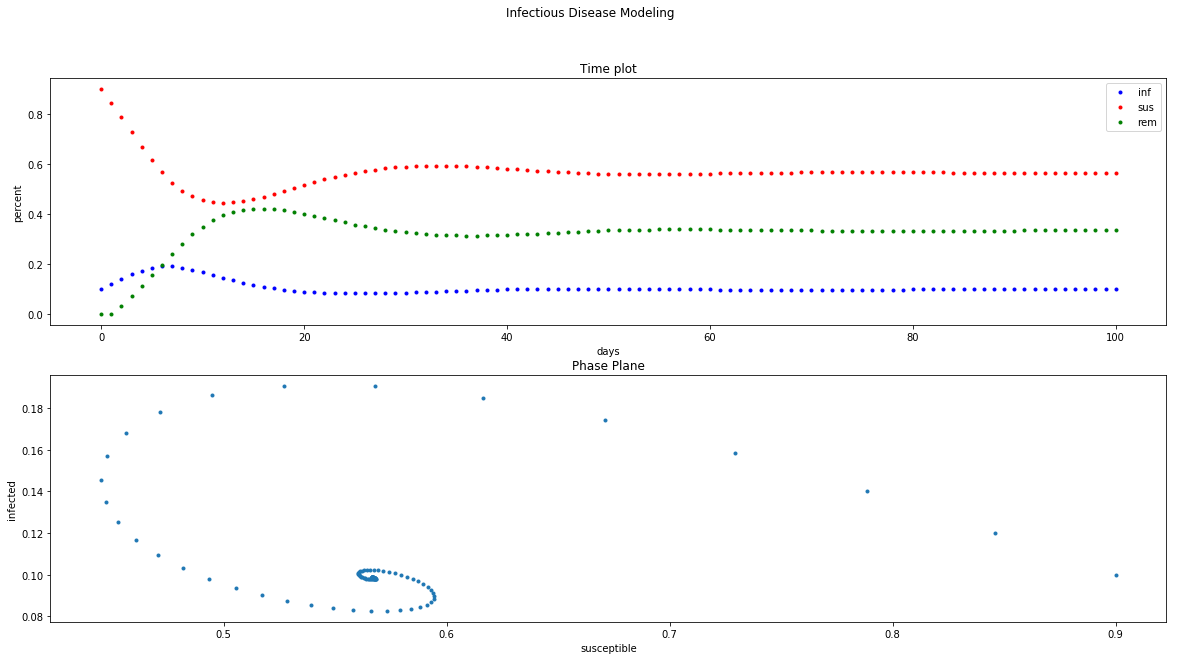

In [112]:
plt.rcParams['figure.figsize'] = [20, 10] #makes figure bigger
fig, (ax1, ax2) = plt.subplots(2) #creates two vertical subplots

fig.suptitle('Infectious Disease Modeling') #puts title above both of them

ax1.plot(days, inf, 'b.', label = 'inf')
ax1.plot(days, sus, 'r.', label = 'sus')
ax1.plot(days, rem, 'g.', label = 'rem')

ax1.set_xlabel('days')
ax1.set_ylabel('percent')
ax1.set_title('Time plot')
ax1.legend(loc='upper right')

ax2.plot(sus, inf, '.')
ax2.set_title('Phase Plane')
ax2.set_xlabel('susceptible')
ax2.set_ylabel('infected')

### Extra Probability and Statistics Lessons are Below

There are a tremendous amount of built-in functions to Python and the NumPy package that allow you to do calculations very quickly. For example, consider the operations on the following list of numbers:

In [113]:
import numpy as np

numbers = [5, 10, 5, 5, -20, 30, -20]
print(f"Max: {max(numbers)}")
print(f"Min: {min(numbers)}")
print(f"Mean: {sum(numbers)/len(numbers)}")
print(f"Another Mean: {np.mean(numbers)}")
print(f"Median: {np.median(numbers)}")
print(f"Standard Deviation: {np.std(numbers)}")

Max: 30
Min: -20
Mean: 2.142857142857143
Another Mean: 2.142857142857143
Median: 5.0
Standard Deviation: 16.22545241657221


That being said, it is helpful to understand the logic behind some of these built-in functions. For example, how would we calculate the maximum number in a list?

In [114]:
def maximum(numbers):
    current_max = numbers[0]
    for number in numbers:
        if number > current_max:
            current_max = number
    return current_max

numbers = [5, 10, 5, 5, -20, 30, -20]
maximum(numbers)

30

How would we calculate the mean? Keep a running tally going.

In [115]:
def mean(numbers):
    length = 0
    tally = 0
    for number in numbers:
        tally = tally + number
        length = length + 1
    return tally / length

numbers = [5, 10, 5, 5, -20, 30, -20]
mean(numbers)

2.142857142857143

### The Random Package
We mentioned that the numpy package contains functions like median and standard deviation that are useful. The random package also contains functions that will be very helpful for simulations.

To generate a random number between 0 and 1, we can use the random package:

In [116]:
print(random.random())

0.45743489400945725


To generate five random numbers, we could create a loop:

In [117]:
import random

for i in range(5):
    print(random.random())

0.8098632628016416
0.0015476028490429838
0.9892332114340467
0.8035858551473497
0.5179616163087221


To simulate five rolls of a die between 1 and 6, inclusive, type:

In [118]:
import random

for i in range(5):
    print(random.randint(1,6))

3
5
4
3
1


We can also use the random function to pick random elements from a list. For example, to pick a random student's name from a group of 5 students, we could type:

In [119]:
students = ['Jack', 'Abby', 'Mary', 'Peter', "Stella"]
print(random.choice(students))

Mary


If I wanted to generate two random names from the list, I could use the sample method, which samples without replacement:

In [120]:
students = ['Jack', 'Abby', 'Mary', 'Peter', "Stella"]
print(random.sample(students,2))

['Stella', 'Peter']


Suppose you want to simulate rolling a die and add each die roll to a list. Yes, you can create a list of numbers 1,2,3,4,5, and 6, but if you do rand(sample, 3), then you'll never get the same number twice, which doesn't make sense, since the rolls of the dice are independent of each other. To randomly generate ten rolls and add them to a list, where some numbers may be the same, type:

In [121]:
rolls = []
for i in range(10):
    rolls.append(random.randint(1,6))
print(rolls)

[6, 1, 4, 6, 1, 2, 4, 6, 1, 6]


What if it wasn't a fair die? What if the probability of getting each number was given by:

|  Die Face |Probability   |
|---   |---   |
|1 |0.05  | 
|2 | 0.05 |
|3 |0.50  |
|4 | 0.10 |
|5 |0.20  |
|6 | 0.10 |

Then we would select numbers between 0 and 99 based on the above probabilities. For example, since there is a 5% chance that we will roll a 1, we'll assign the numbers 0,1,2,3, and 4 to the die roll 1. Here are fifty rolls:

In [122]:
rolls = []
for i in range(50):
    roll = random.randint(0,99)
    if 0 <= roll < 5:
        rolls.append(1)
    if 5 <= roll < 10:
        rolls.append(2)
    if 10 <= roll < 60:
        rolls.append(3)
    if 60 <= roll < 70:
        rolls.append(4)
    if 70 <= roll < 90:
        rolls.append(5)
    if 90 <= roll < 100:
        rolls.append(6)
print(rolls)

[5, 3, 3, 3, 5, 3, 3, 3, 3, 6, 3, 5, 1, 2, 3, 5, 3, 5, 6, 5, 4, 4, 4, 3, 3, 4, 2, 4, 1, 3, 3, 2, 3, 3, 4, 3, 6, 4, 2, 3, 4, 3, 3, 4, 3, 2, 3, 3, 4, 6]


What was our average die roll?

In [123]:
print(np.mean(rolls))

3.5


### Expected Value

Let's go back to a fair die:

|  Die Face |Probability   |
|---   |---   |
|1 |1/6  | 
|2 | 1/6 |
|3 |1/6  |
|4 | 1/6 |
|5 |1/6  |
|6 | 1/6 |


We can calculate the expected value of the die face by adding the products of the face value times the probabilities of getting that face value: (1)(1)(1/6)+(2)(1/6)+(3)(1/6)+(4)(1/6)+(5)(1/6)+(6)(1/6) = 3.5.

Consider the following scenario. You bet a dollar to play a game. If you roll a die and get a six, then you win 5 dollars. If you roll any other number, you lose your dollar. What are the theoretical probabilities?

|  Earnings |Probability   |
|---   |---   |
|-1 |5/6  | 
|5 | 1/6 |

Now, the expected value of your earnings would be (-1)(5/6)+(5)(1/6) = 0 dollars.

### In-class Exercise: 

Simulate this game numerically. Initialize your earnings to zero and randomly roll a die (i.e., generate a random number between 1 and 6). If we roll a 6, we'll give ourselves five dollars; otherwise, we'll lose a dollar. Roll the die 10000 times to see that we get an experimental average earning of close to zero. 

Bonus: Can you plot your average earnings versus your roll number?

-0.0004


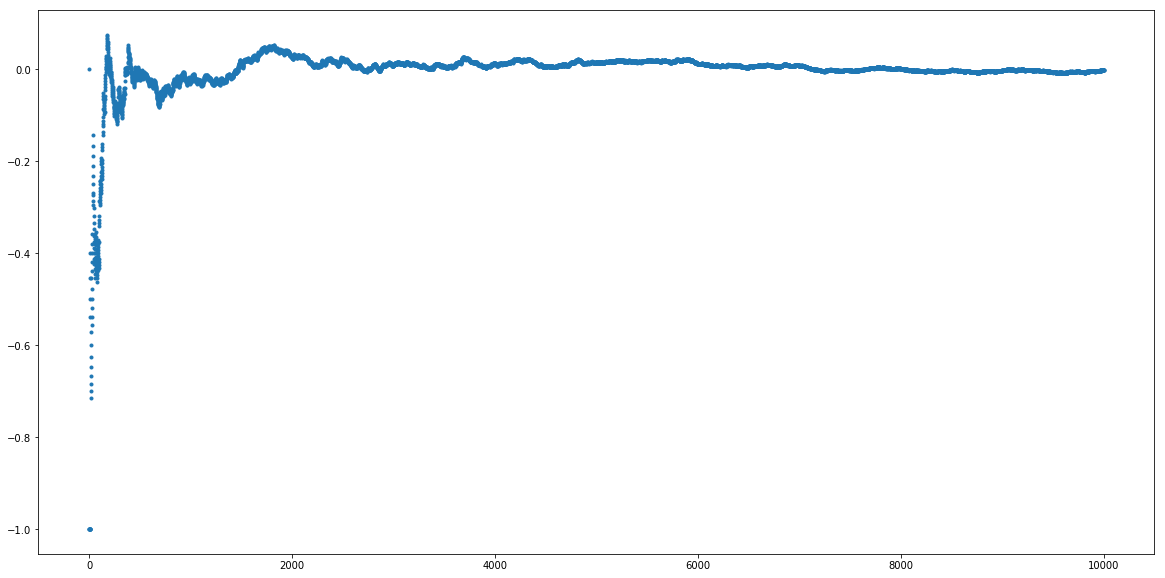

In [124]:
earnings = 0
avg_earnings = [0]
number_of_sims = [0]

for i in range(10000):
    
    die = random.randint(1,6)
    
    if die == 6:
        earnings = earnings + 5
    else:
        earnings = earnings - 1

    number_of_sims.append(number_of_sims[-1]+1)
    avg_earnings.append(earnings/number_of_sims[-1])
    
print(avg_earnings[-1])
plt.plot(number_of_sims, avg_earnings,'.')

### Craps

Now, we'll learn how to play craps. Craps is based off calculating the sum of two dice. If two dice with faces 1-6 are rolled, then the possible sums are 2-12. Here are the theoretical probabilities:

|  Sum |Probability   |
|---   |---   |
|2 |1/36  | 
|3 | 2/36 |
|4 |3/36  |
|5 | 4/36 |
|6 |5/36  |
|7 | 6/36 |
|8 | 5/36 |
|9 | 4/36 |
|10 | 3/36 |
|11 | 2/36 |
|12 | 1/36 |

Okay, so now you know the theoretical probabilities. Let's calculate the experimental probabilities, though. We'll use the randint function to simulate two different dice rolls. We'll calculate the sum of the two dice. We'll create a list called sums that contains the sums from performing this simulation 10,000 times.

In [125]:
sums = []
for i in range(10000):
    die1 = random.randint(1,6)
    die2 = random.randint(1,6)
    sums.append(die1+die2)

We'll view a histogram of the sums of the dices:

Text(0, 0.5, 'frequency')

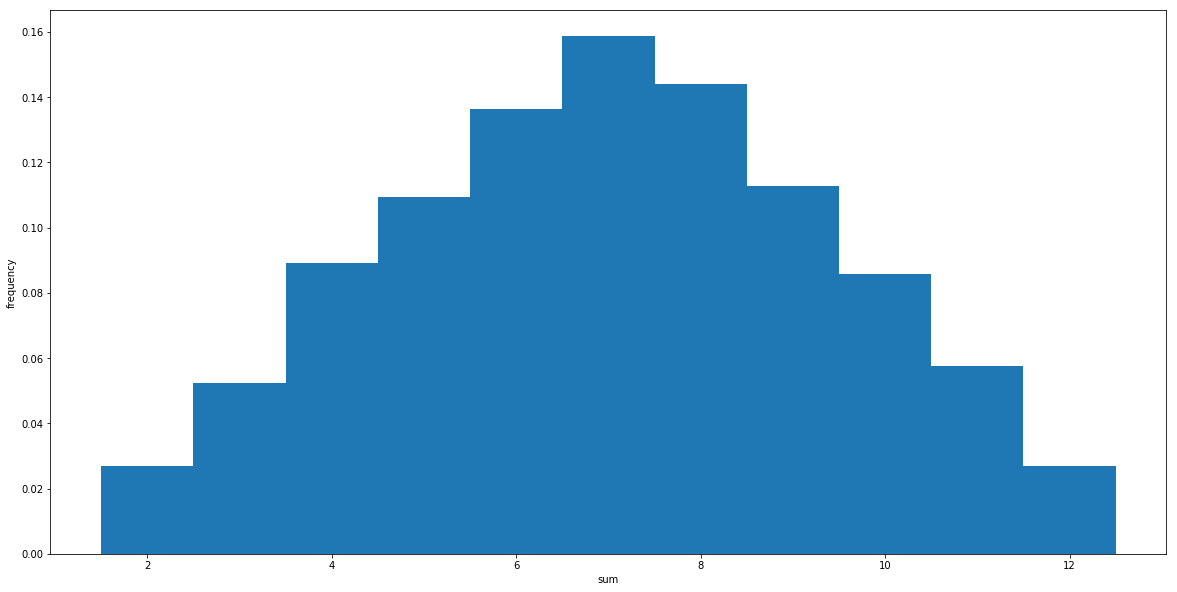

In [126]:
plt.hist(sums, bins = 11, range = (1.5,12.5), density = True)
plt.xlabel('sum')
plt.ylabel('frequency')

One of the most common types of bets in craps is a place bet. A place bet is betting on a number and wanting that number to come up before a 7 does. For example, if I bet on 4, then I am wanting a sum of 4 to come up before a sum of 7. I will continue to roll the dice until either a 4 or a 7 comes up, none of the other sums matter. What is the probability that you win this type of bet? 3/9, since there are 3 ways to win ((1,3), (2,2), or (3,1)) and 6 ways to lose ((1,6), (2,5), (3,4), (4,3), (5,2), (6,1)).

The theoretical probabilities of winning each place bet is below:

|  Sum |Probability   |
|---   |---   |
|4 |3/9  |
|5 | 4/10 |
|6 |5/11  |
|8 | 5/11 |
|9 | 4/10 |
|10 | 3/9 |

Let's calculate the experimental probability of winning the Place 6 bet. We'll roll the dice 10,000 times and calculate the percentage of times that you win. Our decimal should be very close to the theoretical probability in the table above.

Note: just because we rolled the dice 10,000 times does not mean that your number of wins + losses adds up to 10,000, because only a dice sum of 6 or 7 matters.

In [127]:
wins = 0
mybet = 6
losses = 0
for i in range(10000):
        if sums[i] == 7:
            losses = losses + 1
        if sums[i] == mybet:
            wins = wins + 1

print('number of games', wins+losses)            
print('winning percentage', wins/(wins+losses))

number of games 2952
winning percentage 0.46239837398373984


We can make a time plot of our simulation number versus winning percentage:

Text(0.5, 1.0, 'winning percentage of the 6 place bet')

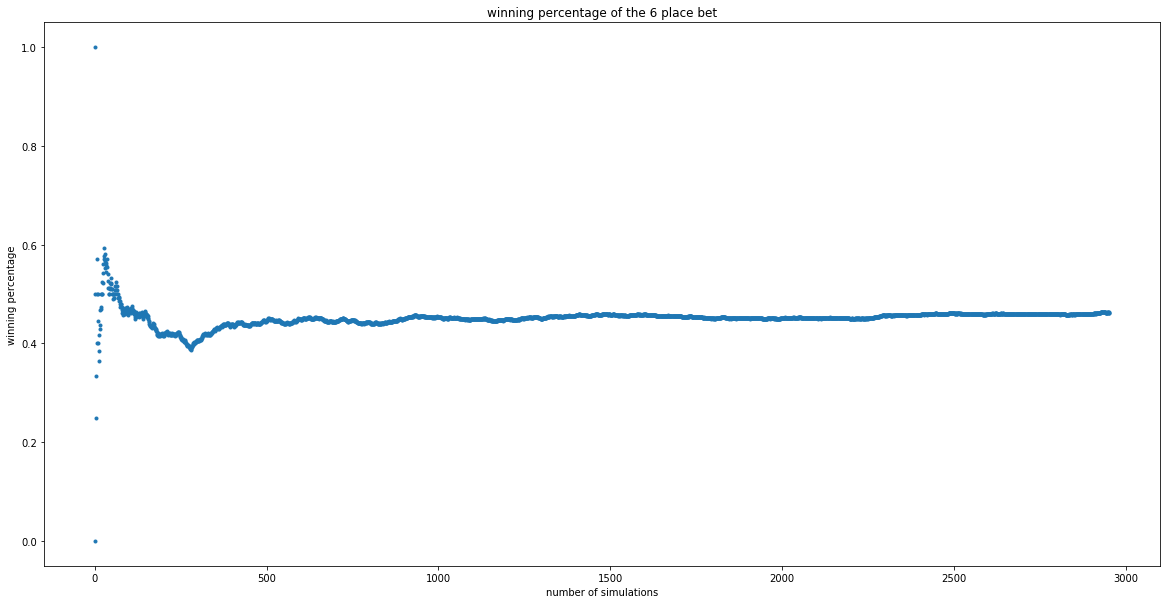

In [128]:
wins = 0
mybet = 6
losses = 0
num_of_sims = [0]
percent = [0]
for i in range(10000):
        if sums[i] == 7:
            losses = losses + 1
            num_of_sims.append(num_of_sims[-1] + 1)
            percent.append(wins/(wins+losses))
        if sums[i] == mybet:
            wins = wins + 1
            num_of_sims.append(num_of_sims[-1] + 1)
            percent.append(wins/(wins+losses))
plt.plot(num_of_sims, percent, '.')
plt.xlabel('number of simulations')
plt.ylabel('winning percentage')
plt.title('winning percentage of the 6 place bet')

### Exercise 6 - Min
Create a function called minimum that returns the minimum number in a list of numbers.

In [129]:
#insert exercise 6
def minimum(numbers):
    current_min = numbers[0]
    for number in numbers:
        if number < current_min:
            current_min = number
    return current_min

numbers = [5, 10, 5, 5, -20, 30, -20]
minimum(numbers)

-20

### Exercise 7 - First Index of Min
Create a function called minimum_index that returns the first index of the minimum number in a list of numbers. For example, the list ```[5, 10, 5, 5, -20, 30, -20]``` should return an index of 4.

In [130]:
#insert exercise 7
def minimum_index(numbers):
    current_min = numbers[0]
    current_min_index = 0
    for i in range(len(numbers)):
        if numbers[i] < current_min:
            current_min = numbers[i]
            current_min_index = i
    return current_min_index

numbers = [5, 10, 5, 5, -20, 30, -20]
minimum_index(numbers)

4

### Exercise 8 - Standard Deviation
Create a function called st_dev that calculates standard deviation. You can use the np.mean() or sum()/len() operations to quickly calculate the mean. Recall that $\text{st_dev} =  \sqrt \frac{\sum_{i=1}^n (x_i-x_{\text{mean}})^2}{n}$.

In [131]:
#insert exercise 8
def st_dev(numbers):
    tally = 0
    average = np.mean(numbers)
    for number in numbers:
        tally = tally + (number - average)**2
    return np.sqrt(tally/len(numbers))

numbers = [5, 10, 5, 5, -20, 30, -20]
st_dev(numbers)

16.22545241657221

### Exercise 9 - Median
If you include the line ```numbers = sorted(numbers)```, your list will be sorted. Use this idea to write a function that calculates the median of a list. Beware that you will need a conditional to figure out if the list is of an even or odd length. Also note that you'll need to put "int" around any division since indices to a list must be integers not decimals. For example, use something like ```int(len(numbers)/2)+1```.

In [132]:
#insert exercise 9
def median(numbers):
    numbers = sorted(numbers)
    if len(numbers) % 2 == 1:
        middle = int(len(numbers)/2)+1
        return numbers[middle]
    else:
        middle = int(len(numbers)/2)-1
        return (numbers[middle]+numbers[middle+1])/2
    
median([5, 10, 5, 5, -20, 30, -20])

5